In [17]:
import platts_sdk as platts
import pandas as pd

In [4]:
mdd = platts.MarketData(tc)

In [27]:
df = mdd.get_historical_assessments_by_mdc("RI", datetime.datetime(2022,12,1))
df.head()

,bate,value,assessDate,isCorrected,modDate,symbol
0,c,86.82,2022-12-02T00:00:00,N,2022-12-02T17:56:17,AAEIZ00
1,h,86.84,2022-12-02T00:00:00,N,2022-12-02T17:56:17,AAEIZ00
2,l,86.80,2022-12-02T00:00:00,N,2022-12-02T17:56:17,AAEIZ00
3,c,85.26,2022-12-05T00:00:00,N,2022-12-05T17:49:31,AAEIZ00
4,h,85.28,2022-12-05T00:00:00,N,2022-12-05T17:49:31,AAEIZ00


In [28]:
filt = df['bate'] == "c"
df = df[filt]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9730 entries, 0 to 22117
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bate         9730 non-null   object 
 1   value        9730 non-null   float64
 2   assessDate   9730 non-null   object 
 3   isCorrected  9730 non-null   object 
 4   modDate      9730 non-null   object 
 5   symbol       9730 non-null   object 
dtypes: float64(1), object(5)
memory usage: 532.1+ KB


In [29]:
sym = df['symbol'].unique()[:10]
df = df[df['symbol'].isin(sym)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 0 to 1134
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bate         379 non-null    object 
 1   value        379 non-null    float64
 2   assessDate   379 non-null    object 
 3   isCorrected  379 non-null    object 
 4   modDate      379 non-null    object 
 5   symbol       379 non-null    object 
dtypes: float64(1), object(5)
memory usage: 20.7+ KB


In [30]:
df['assessDate'] = pd.to_datetime(df['assessDate'])
df['modDate'] = pd.to_datetime(df['modDate'])

In [31]:
pt = df.pivot_table("value", index="assessDate", columns="symbol")
pt.head()

symbol,AAEIZ00,AAEJB00,AAEJD00,AAGIZ00,AAGVX00,AAGVY00,AAGWZ00,AAGXB00,AAGXD00,AAGXF00
assessDate,,,,,,,,,,
2022-12-02,86.820,84.470,70.570,88.275,0.04,0.07,1.330,3.65,4.3,4.10
2022-12-05,85.260,82.910,69.250,86.900,0.16,0.27,1.295,3.60,4.3,4.05
2022-12-06,80.570,78.220,64.235,81.825,0.14,0.17,1.255,3.55,4.3,4.00
2022-12-07,78.680,76.330,62.345,79.900,-0.01,0.37,1.180,3.55,4.3,4.00
2022-12-08,76.505,74.155,60.660,77.530,0.09,0.13,1.180,3.19,4.1,3.70


In [37]:
import matplotlib.pyplot as plt

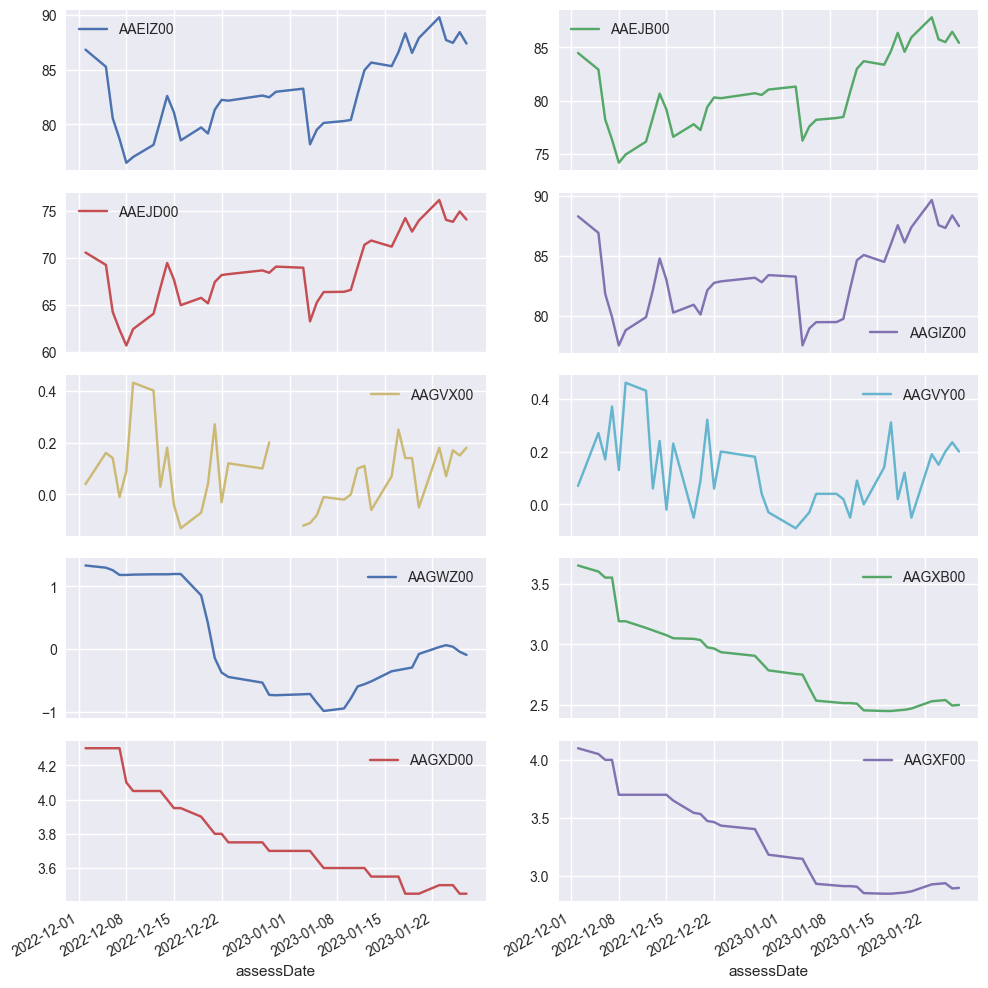

In [72]:
pt.plot(subplots=True, sharex=True, sharey=False, layout=(5,2), figsize=(10,10))
plt.tight_layout()

In [70]:

plt.style.use("seaborn")


/var/folders/q1/1m6n44rn0kd238x8hhz3nctc0000gn/T/ipykernel_67341/178633007.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [21]:
df['diff'] = df['modDate'] - df['assessDate']
df.head()

,bate,value,assessDate,isCorrected,modDate,symbol,diff
1500,c,308.56,2022-12-02,N,2022-12-01 12:09:33,AABPR00,-1 days +12:09:33
1501,c,359.90,2022-12-03,N,2022-12-02 12:08:36,AABPR00,-1 days +12:08:36
1502,c,310.00,2022-12-04,N,2022-12-03 12:07:36,AABPR00,-1 days +12:07:36
1503,c,279.00,2022-12-05,N,2022-12-04 12:07:36,AABPR00,-1 days +12:07:36
1504,c,272.30,2022-12-06,N,2022-12-05 12:09:08,AABPR00,-1 days +12:09:08


In [22]:
df['diff'].describe()

count                            600
mean     -1 days +12:16:44.066666667
std        0 days 00:37:07.246972688
min                -1 days +12:07:27
25%         -1 days +12:08:48.250000
50%         -1 days +12:09:14.500000
75%         -1 days +12:09:46.500000
max                -1 days +15:48:25
Name: diff, dtype: object

In [73]:
tc.token

'eyJraWQiOiJTUEdMQkRvbWFpbiIsIng1dCI6InkxX0ZTTjl6UXJOSG1kRDh3Z0pOVzFmVDI0OCIsImFsZyI6IlJTMjU2In0.eyJpc3MiOiJodHRwczovL2xvZ2luLnNwZ2xvYmFsLmNvbTo0NDMvb2F1dGgyIiwiYXVkIjoiUGxhdHRzQVBJUGxhdGZvcm0iLCJleHAiOjE2NzUwNTE1ODEsImp0aSI6Ijl4dzItci1OYl81WmJWdFc5RlUwNWciLCJpYXQiOjE2NzUwNDc5ODEsInN1YiI6IkFORFJFVy5DSFJJU1RJRUBTUEdMT0JBTC5DT00iLCJ1aWQiOiJBTkRSRVcuQ0hSSVNUSUVAU1BHTE9CQUwuQ09NIiwiZGlzdHJpYnV0b3JQbGF0Zm9ybSI6IkFQSSIsImNvdW50cnkiOiJOVUxMIiwicmVzU3J2QXR0ci1TdGF0aWMiOiJSRVNPVVJDRUNPTlNUIiwiRW1haWwiOiJhbmRyZXcuY2hyaXN0aWVAc3BnbG9iYWwuY29tIiwiRmlyc3ROYW1lIjoiQW5kcmV3IiwiR3JvdXBzIjoiUExNRFZfUk9MRV9FVVJPUEU6Q0ZMT1dfWlpaSU5UX1dFQl9DRkxPOlBMTURWX1JPTEVfUE9XRVI6U0NfWFBSRVNTRkVFRDpTQ19YUFJFU1NGRUVEIERBVEEgR1VJREU6U0NfR0RTLUFQSTpQTE1EVl9BTEw6UExNRFZfUk9MRV9OQVRHQVM6UExNRFZfUk9MRV9OR0w6U0NfQUxMOlJPTEVfQUxMOlBMTURWX1JPTEU6R0RTLUFQSV9BTEwiLCJzZXNzaW9uSWQiOiI3OTc0NTFkMGEyNzMzMmI5ODI4NjgzNzI1NzI2MTlhY2U1NmNjM2MwNWFlYjAxNWVmYzdmZTA2Y2U2ZmU4YzMxIiwiTGFzdE5hbWUiOiJDaHJpc3RpZSIsIlNQX1NTT19HUk9VUFMiOiJQTE1EVl9